<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Dudziak/14_4_24_Klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import niezbędnych bibliotek do obliczenia danych i grafikowanie wyników
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [4]:
data = load_breast_cancer()
y = data.target
X = data.data
print(f"Liczba wszystkich przypadków: {len(y)}")

Liczba wszystkich przypadków: 569


In [5]:
#sprawdzanie liczby wszystkich przypadków raka
malignant_count = np.sum(y == 1)
print(f"Przypadki raka złośliwego: {malignant_count}")

Liczba przypadków raka złośliwego: 357


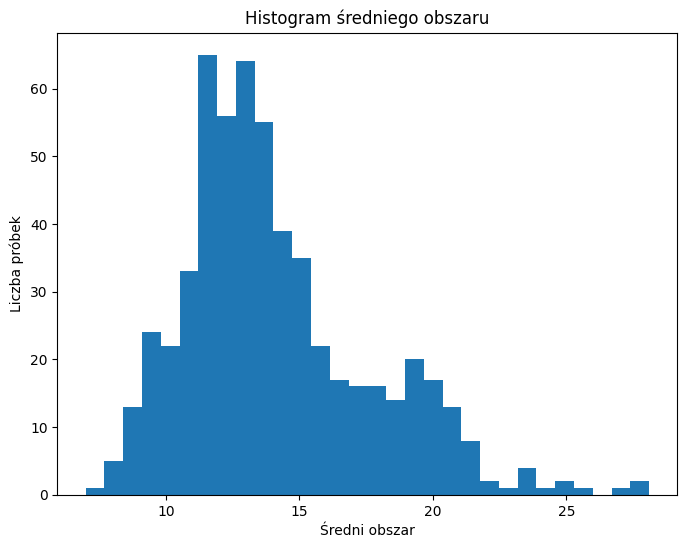

In [6]:
#sprawdzenie rocznej liczby przypadków raka
mean_area = X[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30)
plt.xlabel("Średni obszar")
plt.ylabel("Liczba próbek")
plt.title("Histogram średniego obszaru")
plt.show()

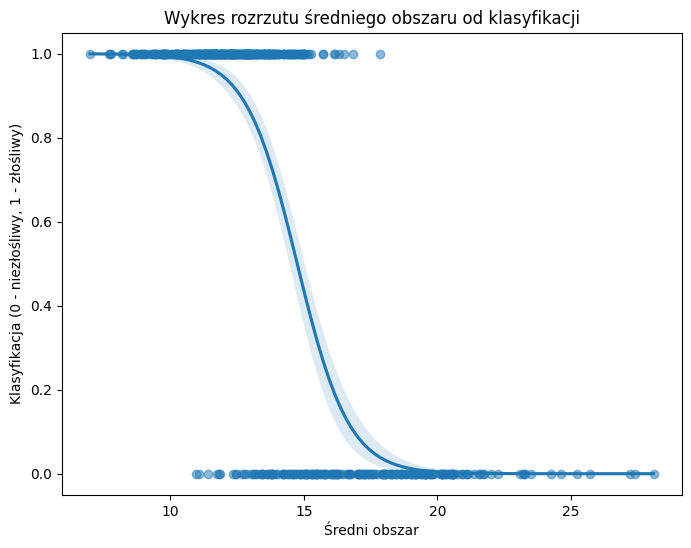

In [7]:
#Histogram średniego obszru
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel("Średni obszar")
plt.ylabel("Klasyfikacja (0 - niezłośliwy, 1 - złośliwy)")
plt.title("Wykres rozrzutu średniego obszaru od klasyfikacji")
plt.show()

In [9]:
# 3. Sprawdzenie  zmiennej na uzyskanie  średnią wartość oczekiwaną zero i odchylenie standardowe jeden
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mean = np.mean(X_scaled)
std = np.std(X_scaled)
print(f"Średnia wartość oczekiwana {mean} (powinna być bliska 0)")
print(f"Odchylenie standardowe: {std} (powinno być bliskie 1)")

Średnia wartość oczekiwana -6.118909323768877e-16 (powinna być bliska 0)
Odchylenie standardowe: 1.0 (powinno być bliskie 1)


In [11]:
# Podzial  danych na uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [14]:
# model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# określenie wartości modelu
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9824561403508771


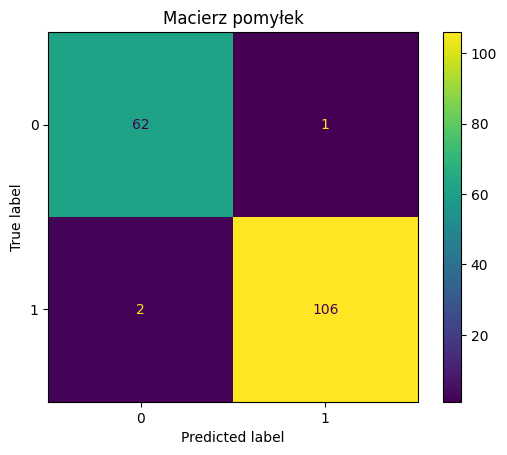

In [16]:
# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Macierz pomyłek")
plt.show()

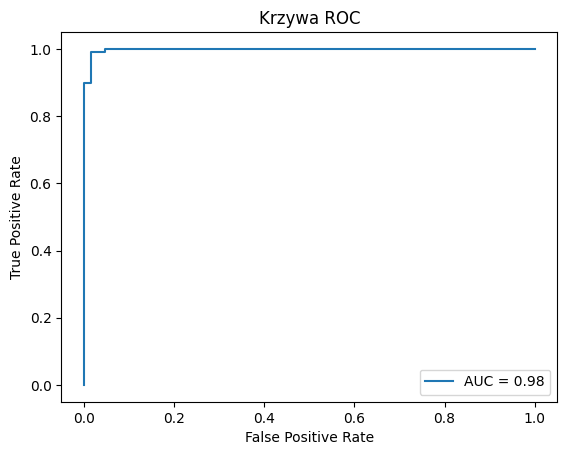

In [19]:
# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = model.score(X_test, y_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_disp.plot()
plt.title("Krzywa ROC")
plt.show()